## **Fouille de données (2024-2025)**

### **Travaux pratiques n°5**

---

**Importation des bibliothèques**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv("train_Insurance.csv")
print(df)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H13501               2012             1.0            1   
1         H14962               2012             1.0            0   
2         H17755               2013             1.0            1   
3         H13369               2016             0.5            0   
4         H12988               2012             1.0            0   
...          ...                ...             ...          ...   
5007      H13682               2013             1.0            0   
5008      H18342               2012             0.5            0   
5009      H16892               2015             1.0            1   
5010      H18805               2012             0.5            0   
5011      H18228               2013             1.0            1   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U              1240.0   
1                   N    

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


,YearOfObservation,Insured_Period,Residential,Building Dimension
count,5012.000000,5012.000000,5012.000000,4935.000000
mean,2013.660215,0.869713,0.301077,1876.898683
std,1.383134,0.219496,0.458772,2267.277397
min,2012.000000,0.500000,0.000000,1.000000
25%,2012.000000,0.500000,0.000000,520.000000
50%,2013.000000,1.000000,0.000000,1067.000000
75%,2015.000000,1.000000,1.000000,2280.000000
max,2016.000000,1.000000,1.000000,20840.000000


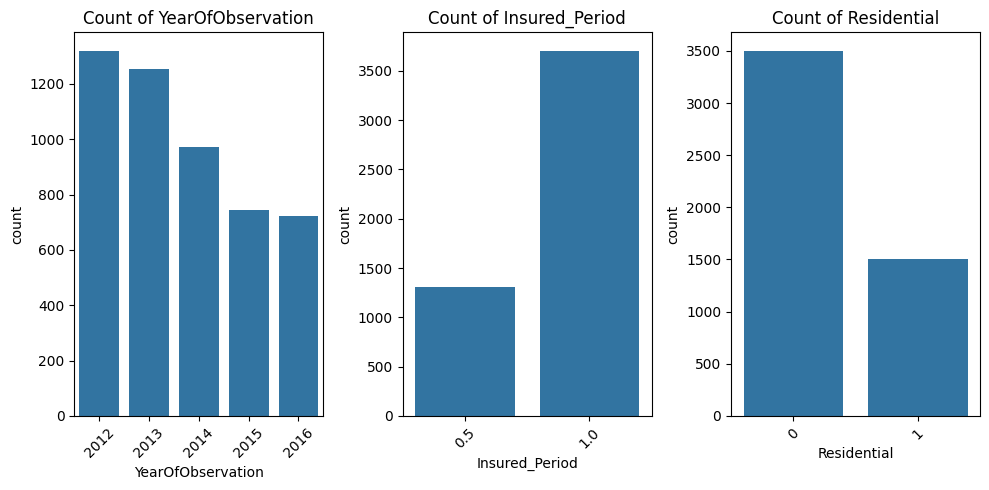

In [ ]:
features = ['YearOfObservation', 'Insured_Period', 'Residential']
# Create count plots
plt.figure(figsize=(10, 5))  # Adjust figure size to fit all subplots

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
plt.tight_layout()  # Adjust spacing between plots
plt.show()

([<matplotlib.patches.Wedge at 0x18b0f465400>,
 [Text(-0.7758647755919935, -0.7797652531342916, 'V'),
  Text(0.7758647390885471, 0.7797652894551416, 'N')],
 [Text(-0.42319896850472366, -0.42532650170961356, '75.1%'),
  Text(0.42319894859375295, 0.42532652152098627, '24.9%')])

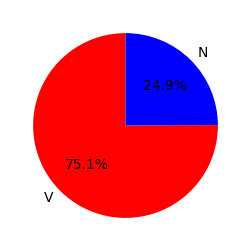

In [38]:
plt.figure(figsize=(5, 3))
painted=df['Building_Painted'].value_counts()
labels=list(painted.index)
colors = ['red', 'blue']
plt.pie(painted, labels=labels,
     colors=colors, autopct='%1.1f%%',
                 startangle=90)

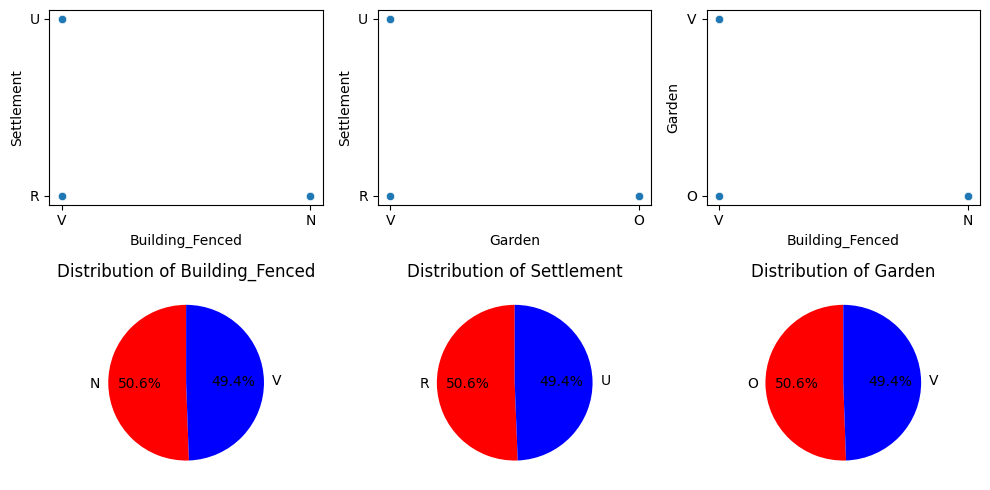

In [36]:
# Example dataset (replace 'df' with your actual dataframe)
# df = your_dataframe

# Define pairs of x and y variables for three scatter plots
scatter_pairs = [
    ('Building_Fenced','Settlement'),
    ('Garden', 'Settlement'),
    ('Building_Fenced', 'Garden'),
]

# Pie chart features and configurations
pie_features = [
    'Building_Fenced',
    'Settlement',
    'Garden',
]

# Create combined plots
plt.figure(figsize=(10, 5))  # Adjust figure size to fit all subplots



# Add pie charts
for i, feature in enumerate(pie_features, start=4):
    plt.subplot(2, 3, i)  # Continue subplot numbering
    feature_counts = df[feature].value_counts()
    labels = list(feature_counts.index)
    colors = ['red', 'blue', 'orange', 'purple'][:len(labels)]  # Adjust colors as needed
    plt.pie(feature_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {feature}")
# Add scatter plots
for i, (x, y) in enumerate(scatter_pairs, start=1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.scatterplot(data=df, x=x, y=y)
plt.tight_layout()  # Adjust spacing between plots
plt.show()


ValueError: Could not interpret value `Revenu` for `x`. An entry with this name does not appear in `data`.

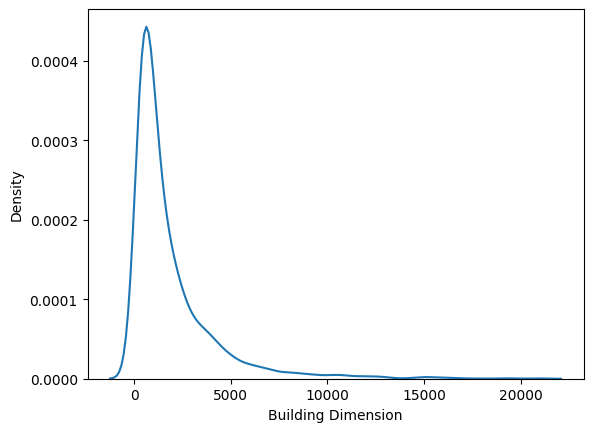

In [45]:
sns.kdeplot(df['Building Dimension'],bw_method='scott',bw_adjust=1)
sns.histplot(x='Building Dimension', data=df,bins=3, kde=True, stat='density')

In [2]:
#Assemblage Google Drive dans Colaboratory
#from google.colab import drive
#drive.mount('/content/drive')

**1/** Charger le jeu de données **bodyPerformance.csv** dans un DataFrame $b\_performance$, puis afficher ses $5$ premières lignes

In [3]:
#b_performance=_________________________________


**2/** Afficher le nombre de *valeurs manquantes* pour chaque attribut de $b\_performance$

**3/** Supprimer, à partir de $b\_performance$, les observations ayant une *valeur manquante* dans l’attribut **sit_bend** ainsi que celles ayant <u>moins de $10$ valeurs non manquantes</u>

In [4]:
#______________________________________

#b_performance.isnull().sum()

**4/** Appliquer la <font color="red">**Régression Linéaire**</font> pour déterminer la ou les valeur(s) manquante(s) de l’attribut **sit_ups** (*utiliser un extrait du jeu de donnée d'apprentissage qui comporte uniquement l’attribut* **sit_bend** *comme descripteur et l’attribut* **sit_ups** *comme classe* <u>pour toutes les observations n’ayant pas une valeur manquante</u>)

**5/** Remplir les valeurs manquantes de l’attribut **diastolic** par <u>la valeur maximale du groupe de poids<u> **weight** (**Fat**, **Normal**, **Thin**) auquel appartient l’observation en cours

In [5]:
#group=b_performance.groupby([___________________])[_____________________________].max()

#b_performance['diastolic'].fillna(____________________________________________________, inplace=True)

#b_performance

**6/** Présenter le **Kde** de l’attribut **Age** de $b\_performance$. Ensuite, transformer l’attribut **Age** en $4$ intervalles, codés par $0$, $1$, $2$, et $3$, <font color=blue>**<u>en adoptant la technique de discrétisation la plus adéquate</u>**</font>

In [7]:
#plt.figure(figsize=(6,4))
#______________________________________________________

#plt.show()


In [8]:
#EwD=KBinsDiscretizer(______________________________________________________)

#b_performance['age']=____________________________________________________

**7/** Transformer les $3$ valeurs de l’attribut **weight** en $3$ attributs *binaires* : $1$ et $0$. Les nouvelles colonnes doivent être ajouter dans les $3$ *premières positions* de $b\_performance$ selon l’ordre suivant: **[' Normal', 'Thin', 'Fat']**

**8/** Transformer $b\_performance$ en $2$ tableaux ndarray $X$ et $Y$;  $X$  contient les valeurs des variables descripteurs, et $Y$ contient les valeurs de la classe. Ensuite, séparer les données en $2$ parties: $70\%$ observations sélectionnées aléatoirement sans répétions pour l’apprentissage $(X\_train$, $Y\_train)$ , et les $30\%$ restantes pour le test $(X\_test$, $Y\_test)$

In [9]:
#X = b_performance.iloc[:,_______________].values
#Y = b_performance.iloc[:, ___________________].values

#X_train, X_test, Y_train, Y_test =________________________________________________________

**9/** Appliquer la méthode <font color="red">**SMOTE**</font> sur les données d’apprentissage $(X\_train$, $Y\_train)$ pour créer des <u>données synthétiques</u> $(X\_train\_r$, $Y\_train\_r)$ de la classe *minoritaire* **D**, de manière à obtenir le même nombre d’observations que la classe **C**

In [10]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(_____________________________________________________)

#_________________________________________________________________________


**10/** Appliquer <font color="red">**RandomSearchCV**</font> pour déterminer le <u>nombre optimal d’arbres</u> *(de 10 à 100 avec un pas de 10)* et la <u>profondeur adéquate de l'arbre</u> *(2, 3, 4, 5, 6)* pour un **RandomForestClassifier**, en évaluant les modèles avec la métrique **'f1_micro'** et une validation croisée à $5$-Folds sur $10$ itérations. <u>Indiquer le meilleur choix</u>

In [ ]:
#____________________________________________________________


**11/** Appliquer un ***VotingClassifier*** sur trois modèles : $model1$,$model2$ et $model3$, où $model1$ est obtenu par **<font color="red">RandomForestClassifier</font>** (q10), $model2$ est obtenu en appliquant **<font color="red">DecisionTreeClassifier**</font> avec **max_depth=**$3$ et **max_features="sqrt"**</font>, $model3$ est obtenu en appliquant **<font color="red">LogisticRegression</font>** en gardant les hyperparamètres par défaut. Ensuite, <u>évaluer la performance du vote majoritaire sur les données d'apprentissage et de test en termes d’*accuracy*</u>

In [ ]:
#_____________________________________________________________


#voting_clf = VotingClassifier(____________________________________________________________________ voting=______________________)

#____________________________________

**12/** Créer un **méta-modèle** en appliquant **<font color="red">LogisticRegression</font>**, nommé $stacking\_clf$, qui utilise les scores de prédiction (**<font color="blue">predict_proba</font>**) de chacun des modèles présentés dans (q11) avec une validation croisée à $3$-plis, <u>sans inclure les descripteurs originaux lors de l’apprentissage</u>. Ensuite, évaluer $stacking\_clf$ sur les données d'apprentissage et de test en termes d’*accuracy*

In [13]:
#______________________________________________
#stacking_clf = StackingClassifier(________________________________________)

#___________________________________________________________________

**13/** Déterminer la mesure **AUC** obtenue par $stacking\_clf$, en prenant en considération que **A** <u>représente
 la classe positive</u> et que <u>le reste correspond aux classes négatives</u>

In [14]:
#_________________________________________________________
